### 1. Импорт библиотек и подготовка датафрейма:

In [1]:
import pandas as pd
import random
import numpy as np
import matplotlib.pyplot as plt
from prophet import Prophet
import logging
import cmdstanpy

15:40:42 - cmdstanpy - INFO - Chain [1] start processing
15:40:42 - cmdstanpy - INFO - Chain [1] done processing
P:\Python\Lib\site-packages\prophet\plot.py:72: FutureWarning: The behavior of DatetimeProperties.to_pydatetime is deprecated, in a future version this will return a Series containing python datetime objects instead of an ndarray. To retain the old behavior, call `np.array` on the result
  fcst_t = fcst['ds'].dt.to_pydatetime()
P:\Python\Lib\site-packages\prophet\plot.py:73: FutureWarning: The behavior of DatetimeProperties.to_pydatetime is deprecated, in a future version this will return a Series containing python datetime objects instead of an ndarray. To retain the old behavior, call `np.array` on the result
  ax.plot(m.history['ds'].dt.to_pydatetime(), m.history['y'], 'k.',


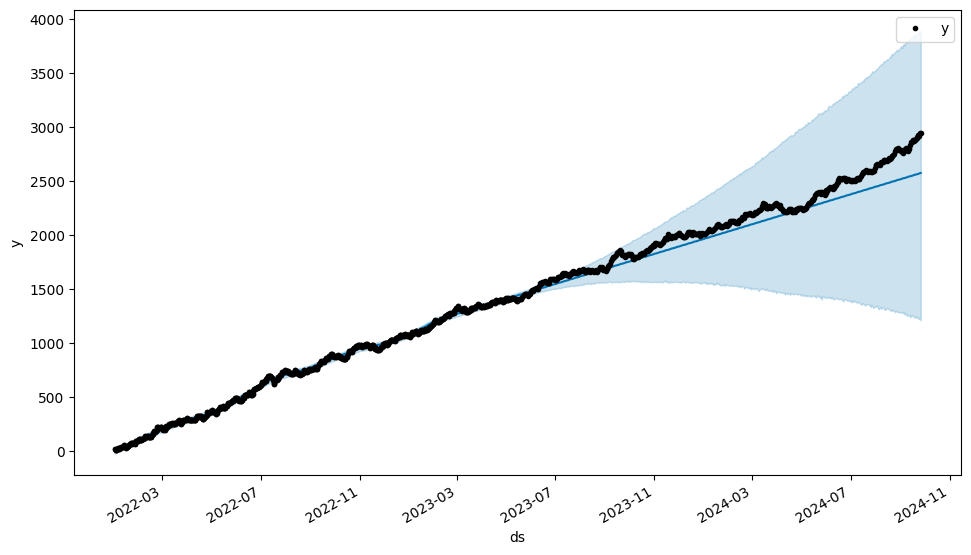

In [2]:
# Создаем временные ряды
data = np.cumsum(np.random.normal(loc=3, scale=10, size=1000))

# Преобразуем массивы NumPy в pandas DataFrame
data = pd.DataFrame({'ds': pd.date_range(start='2022-01-01', periods=len(data), freq='D'), 'y': data})

# Обрезаем датафрейм до 1/2
cut_point = int(len(data) / 2)
data_cut = data.iloc[:cut_point]

# Создаем модель Prophet
model = Prophet(yearly_seasonality=False, daily_seasonality=False)

# Обучаем модель на объединенных данных
model.fit(data_cut)

# Создаем фрейм для прогноза
future = model.make_future_dataframe(periods=500)

# Получаем прогноз
forecast = model.predict(future)

# Вывод результатов
fig = model.plot(forecast)

# Добавляем исходные данные на график
ax = plt.gca()
data.plot(x='ds', y='y', ax=ax, style='k.')

plt.show()

In [3]:
# Отключим уведломения о процессе расчётов для Prophet
logging.getLogger('cmdstanpy').setLevel(logging.WARNING)

### 2. Задания к датафрейму:

1) Проверим data = loc=3, scale=10, size=1000, а future = periods=500
2) Проверим data = loc=10000, scale=100000, size=1000, а future = periods=500
3) Проверим data = loc=3, scale=10, size=10000, а future = periods=5000
4) Проверим data = loc=10000, scale=100000, size=10000, а future = periods=5000

#### 1. Проверим data = loc=3, scale=10, size=1000, а future = periods=500:

In [4]:
# Функция вычисление процента выхода значений из доверительного интервала
def calculate_out_of_bounds_percentage(data, iterations=100):
    out_of_bounds_count = 0

    for _ in range(iterations):
        # Создаем новую модель Prophet для каждой итерации
        model = Prophet(yearly_seasonality=False, daily_seasonality=False)

        # Генерация новых данных
        new_data = np.cumsum(np.random.normal(loc=3, scale=10, size=len(data)))
        new_data = pd.DataFrame({'ds': pd.date_range(start='2022-01-01', periods=len(new_data), freq='D'),
                                 'y': new_data})

        # Обучение модели на новых данных
        model.fit(new_data)

        # Получение прогноза
        future = model.make_future_dataframe(periods=500)
        forecast = model.predict(future)

        # Merge new_data with forecast
        merged_data = pd.merge(new_data, forecast[['ds', 'yhat_lower', 'yhat_upper']], on='ds', how='inner')

        # Подсчет числа значений вне доверительных интервалов
        out_of_bounds_count += ((merged_data['y'] < merged_data['yhat_lower']) | 
                               (merged_data['y'] > merged_data['yhat_upper'])).sum()

    # Вычисление процента выхода значений из доверительного интервала
    out_of_bounds_percentage = out_of_bounds_count / (len(data) * iterations) * 100

    return out_of_bounds_percentage

# Создаем временные ряды
data = np.cumsum(np.random.normal(loc=3, scale=10, size=1000))
data = pd.DataFrame({'ds': pd.date_range(start='2022-01-01', periods=len(data), freq='D'), 'y': data})

# Обрезаем датафрейм до 1/2
cut_point = int(len(data) / 2)
data_cut = data.iloc[:cut_point]

# Создаем модель Prophet
model = Prophet(yearly_seasonality=False, daily_seasonality=False)

# Вызываем функцию для вычисления процента выхода значений из доверительного интервала
percentage = np.round(calculate_out_of_bounds_percentage(data_cut, iterations=100), 2)

# Вывод результатов
print(f'{percentage}% значений исходного датафрейма вышло из значений прогнозируемого доверительного интервала')

20.2% значений исходного датафрейма вышло из значений прогнозируемого доверительного интервала


#### 2. Проверим data = loc=10000, scale=100000, size=1000, а future = periods=500:

In [5]:
# Функция вычисление процента выхода значений из доверительного интервала
def calculate_out_of_bounds_percentage(data, iterations=100):
    out_of_bounds_count = 0

    for _ in range(iterations):
        # Создаем новую модель Prophet для каждой итерации
        model = Prophet(yearly_seasonality=False, daily_seasonality=False)

        # Генерация новых данных
        new_data = np.cumsum(np.random.normal(loc=10000, scale=100000, size=len(data)))
        new_data = pd.DataFrame({'ds': pd.date_range(start='2022-01-01', periods=len(new_data), freq='D'),
                                 'y': new_data})

        # Обучение модели на новых данных
        model.fit(new_data)

        # Получение прогноза
        future = model.make_future_dataframe(periods=500)
        forecast = model.predict(future)

        # Merge new_data with forecast
        merged_data = pd.merge(new_data, forecast[['ds', 'yhat_lower', 'yhat_upper']], on='ds', how='inner')

        # Подсчет числа значений вне доверительных интервалов
        out_of_bounds_count += ((merged_data['y'] < merged_data['yhat_lower']) | 
                               (merged_data['y'] > merged_data['yhat_upper'])).sum()

    # Вычисление процента выхода значений из доверительного интервала
    out_of_bounds_percentage = out_of_bounds_count / (len(data) * iterations) * 100

    return out_of_bounds_percentage

# Создаем временные ряды
data = np.cumsum(np.random.normal(loc=10000, scale=100000, size=1000))
data = pd.DataFrame({'ds': pd.date_range(start='2022-01-01', periods=len(data), freq='D'), 'y': data})

# Обрезаем датафрейм до 1/2
cut_point = int(len(data) / 2)
data_cut = data.iloc[:cut_point]

# Создаем модель Prophet
model = Prophet(yearly_seasonality=False, daily_seasonality=False)

# Вызываем функцию для вычисления процента выхода значений из доверительного интервала
percentage = np.round(calculate_out_of_bounds_percentage(data_cut, iterations=100), 2)

# Вывод результатов
print(f'{percentage}% значений исходного датафрейма вышло из значений прогнозируемого доверительного интервала')

20.7% значений исходного датафрейма вышло из значений прогнозируемого доверительного интервала


#### 3. Проверим data = loc=3, scale=10, size=10000, а future = periods=5000:

In [6]:
# Функция вычисление процента выхода значений из доверительного интервала
def calculate_out_of_bounds_percentage(data, iterations=100):
    out_of_bounds_count = 0

    for _ in range(iterations):
        # Создаем новую модель Prophet для каждой итерации
        model = Prophet(yearly_seasonality=False, daily_seasonality=False)

        # Генерация новых данных
        new_data = np.cumsum(np.random.normal(loc=3, scale=10, size=len(data)))
        new_data = pd.DataFrame({'ds': pd.date_range(start='2022-01-01', periods=len(new_data), freq='D'),
                                 'y': new_data})

        # Обучение модели на новых данных
        model.fit(new_data)

        # Получение прогноза
        future = model.make_future_dataframe(periods=5000)
        forecast = model.predict(future)

        # Merge new_data with forecast
        merged_data = pd.merge(new_data, forecast[['ds', 'yhat_lower', 'yhat_upper']], on='ds', how='inner')

        # Подсчет числа значений вне доверительных интервалов
        out_of_bounds_count += ((merged_data['y'] < merged_data['yhat_lower']) | 
                               (merged_data['y'] > merged_data['yhat_upper'])).sum()

    # Вычисление процента выхода значений из доверительного интервала
    out_of_bounds_percentage = out_of_bounds_count / (len(data) * iterations) * 100

    return out_of_bounds_percentage

# Создаем временные ряды
data = np.cumsum(np.random.normal(loc=3, scale=10, size=10000))
data = pd.DataFrame({'ds': pd.date_range(start='2022-01-01', periods=len(data), freq='D'), 'y': data})

# Обрезаем датафрейм до 1/2
cut_point = int(len(data) / 2)
data_cut = data.iloc[:cut_point]

# Создаем модель Prophet
model = Prophet(yearly_seasonality=False, daily_seasonality=False)

# Вызываем функцию для вычисления процента выхода значений из доверительного интервала
percentage = np.round(calculate_out_of_bounds_percentage(data_cut, iterations=100), 2)

# Вывод результатов
print(f'{percentage}% значений исходного датафрейма вышло из значений прогнозируемого доверительного интервала')

18.09% значений исходного датафрейма вышло из значений прогнозируемого доверительного интервала


#### 4. Проверим data = loc=10000, scale=100000, size=10000, а future = periods=5000:

In [7]:
# Функция вычисление процента выхода значений из доверительного интервала
def calculate_out_of_bounds_percentage(data, iterations=100):
    out_of_bounds_count = 0

    for _ in range(iterations):
        # Создаем новую модель Prophet для каждой итерации
        model = Prophet(yearly_seasonality=False, daily_seasonality=False)

        # Генерация новых данных
        new_data = np.cumsum(np.random.normal(loc=10000, scale=100000, size=len(data)))
        new_data = pd.DataFrame({'ds': pd.date_range(start='2022-01-01', periods=len(new_data), freq='D'),
                                 'y': new_data})

        # Обучение модели на новых данных
        model.fit(new_data)

        # Получение прогноза
        future = model.make_future_dataframe(periods=5000)
        forecast = model.predict(future)

        # Merge new_data with forecast
        merged_data = pd.merge(new_data, forecast[['ds', 'yhat_lower', 'yhat_upper']], on='ds', how='inner')

        # Подсчет числа значений вне доверительных интервалов
        out_of_bounds_count += ((merged_data['y'] < merged_data['yhat_lower']) | 
                               (merged_data['y'] > merged_data['yhat_upper'])).sum()

    # Вычисление процента выхода значений из доверительного интервала
    out_of_bounds_percentage = out_of_bounds_count / (len(data) * iterations) * 100

    return out_of_bounds_percentage

# Создаем временные ряды
data = np.cumsum(np.random.normal(loc=10000, scale=100000, size=10000))
data = pd.DataFrame({'ds': pd.date_range(start='2022-01-01', periods=len(data), freq='D'), 'y': data})

# Обрезаем датафрейм до 1/2
cut_point = int(len(data) / 2)
data_cut = data.iloc[:cut_point]

# Создаем модель Prophet
model = Prophet(yearly_seasonality=False, daily_seasonality=False)

# Вызываем функцию для вычисления процента выхода значений из доверительного интервала
percentage = np.round(calculate_out_of_bounds_percentage(data_cut, iterations=100), 2)

# Вывод результатов
print(f'{percentage}% значений исходного датафрейма вышло из значений прогнозируемого доверительного интервала')

18.13% значений исходного датафрейма вышло из значений прогнозируемого доверительного интервала


По результатам видно что:
- Чем больше размер выборки (size), тем меньше ошибок
- Средняя ошибка (loc) и начальное значение (scale) не влияют на количество ошибок